# Olympics History Data Analysis
### In Q & A format
###### Started: 04th Oct 2023 
###### Ended: 8th Oct 2023

Purpose of this Project:
* Analyze the historical olympics data from 1976 to 2008. 
* Try to find some key important conlusive points .
* Process and transform the given data.
* Create some interactive visualization.
* Research online about why and how these facts are the way they are. (will try to put in some comments in between emphasizing the reason)

In [117]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
pd.options.display.max_rows = 4000
pd.options.display.max_columns= None
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-olympics-medals/Summer-Olympic-medals-1976-to-2008.csv


### Lets start with loading the dataset and print few rows. 

In [118]:
data = pd.read_csv('/kaggle/input/summer-olympics-medals/Summer-Olympic-medals-1976-to-2008.csv', encoding = 'latin1')
data.head()


,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


#### Lets first see if we can drop any column or not. See that, Gender and Event_gender. Lets see if these two actaully hold value or just duplicates.
#### We will do that first by looking at unique values.

In [119]:
print(data.Gender.unique())
print(data.Event_gender.unique())

['Women' 'Men' nan]
['W' 'M' 'X' nan]


##### Okay, we have an 'X' category for event gender. But since it is not an impacting factor neither there is not much to analyse, we can safe drop off 'Event_gender' column.
##### Also the Country code is of no much use since we have Country column. 
##### Also the Year has to be in proper data type i.e., int. W

In [120]:
data= data.drop('Event_gender', axis  = 1)
data= data.drop('Country_Code', axis  = 1)
data.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,East Germany,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,Soviet Union,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,United States,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,Italy,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,United States,Bronze


#### Lets find null values and try to deal with them. Also, lets fix the data type of the columns.

In [121]:
print(data.isnull().sum())
data = data.dropna(how = 'all')
print(data.isnull().sum())
data = data.astype({'Year':'int'})
data.head()

City          117
Year          117
Sport         117
Discipline    117
Event         117
Athlete       117
Gender        117
Country       117
Medal         117
dtype: int64
City          0
Year          0
Sport         0
Discipline    0
Event         0
Athlete       0
Gender        0
Country       0
Medal         0
dtype: int64


,City,Year,Sport,Discipline,Event,Athlete,Gender,Country,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,East Germany,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,Soviet Union,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,United States,Gold
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,Italy,Silver
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,United States,Bronze


### Q1. Which city hosted maximum number of olympics

Logic : Focus on City and Year. Get unique Year. Print the data.

In [122]:
q1_data = data[["City", 'Year']]
q1_data = q1_data.drop_duplicates('Year')
q1_data

,City,Year
0,Montreal,1976
1422,Moscow,1980
2809,Los Angeles,1984
4268,Seoul,1988
5814,Barcelona,1992
7519,Atlanta,1996
9378,Sydney,2000
11393,Athens,2004
13391,Beijing,2008


### Ans : So It seems like, since 1976 no city has hosteed Olympics twice.

### Q2. Which city hosted most events.

logic: Focus on City.Find count of unique values.Print the count

<Axes: xlabel='City'>

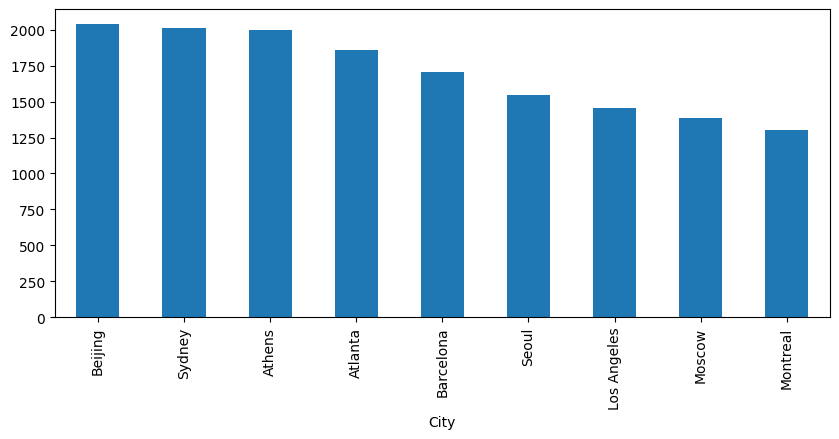

In [123]:
q2_data = data['City'].value_counts()
q2_data.columns = ['City', 'Count']
plt.figure(figsize = (10,4))
q2_data.plot.bar(x = 'City', y = 'Count') # q2_data.plot(kind = 'bar', x= 'City', y = 'Count')


### Ans : Beijing has the hosted the biggest Olympics since 1976 till 2008. Followed by Sydney and Athens.

### Q3. Understand the events themselves. 
logic : Focus on Sport, Discipline and Event. Use groupby and see how many kinds and variations are there.

In [124]:
q3_data = data[['Sport', 'Discipline', 'Event']].drop_duplicates()
print("Total number of unique events are held so far are : ",len(q3_data))
q3_data

Total number of unique events are held so far are :  334


,Sport,Discipline,Event
0,Aquatics,Diving,3m springboard
4,Aquatics,Diving,10m platform
12,Aquatics,Swimming,4x100m freestyle relay
13,Aquatics,Swimming,400m freestyle
15,Aquatics,Swimming,1500m freestyle
16,Aquatics,Swimming,400m individual medley
17,Aquatics,Swimming,4x100m medley relay
18,Aquatics,Swimming,800m freestyle
21,Aquatics,Swimming,200m backstroke
25,Aquatics,Swimming,200m freestyle


<Axes: xlabel='Sport'>

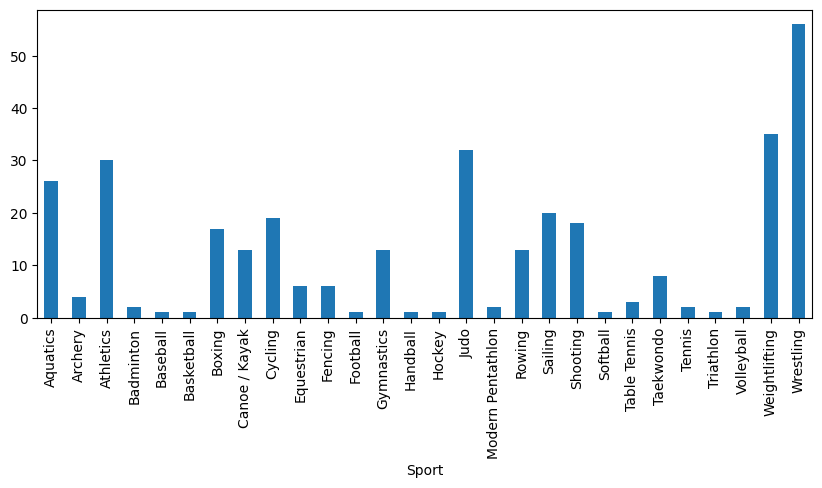

In [125]:
q3_data = q3_data.groupby(['Sport'])['Sport'].size()
plt.figure(figsize = (10,4))
q3_data.plot.bar(x = 'Sport', y = 'Count') 

### Ans. Sports with most events are Wrestling, Weightlifting and Judo. Total number of unique events are held: 334
### Q4. Which Athlete has win most medal from given period?

In [126]:
q4_data = data.groupby(['Athlete'])['Athlete'].count().reset_index(name = 'Count').sort_values(ascending = False , by = ['Count'])
q4_data = q4_data[:10]

<Axes: xlabel='Athlete'>

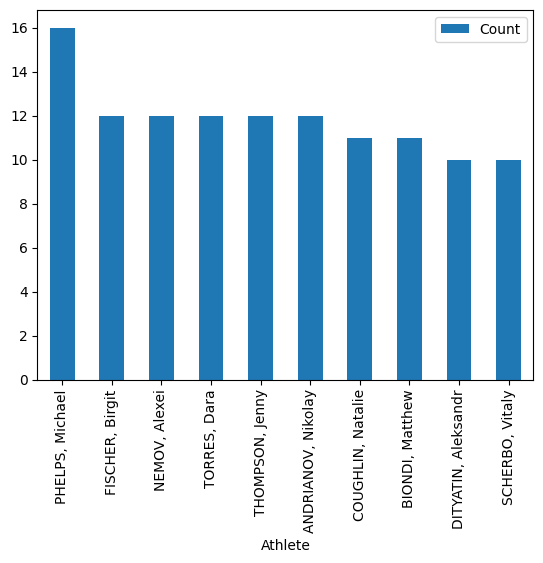

In [127]:
q4_data.plot.bar(x = 'Athlete', y = 'Count')

### Ans. So Michael Phelps won 16 mdeal durin 1976 to 2008. Clearly mindblowing record !!

### Q5. Put some light on gender ratio in winning teams?

<Axes: ylabel='Gender'>

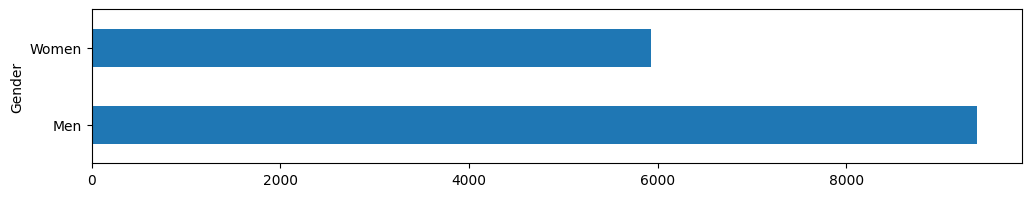

In [128]:
q5_data = data.groupby(['Gender'])['Gender'].count()
plt.figure(figsize = (12,2))
q5_data.plot.barh(x = 'Athlete', y = 'Count')

#### It seems that there are some events which are made only for male.

In [129]:
q5_data = data[['Event', 'Gender']]
q5_data = q5_data.groupby(['Event', 'Gender'])['Gender'].count()
q5_data

Event                                    Gender
+ 100kg (heavyweight)                    Men        16
+ 100kg (super heavyweight)              Men        18
+ 105kg                                  Men         9
+ 108kg, total (super heavyweight)       Men         3
+ 110kg, total (super heavyweight)       Men        15
+ 67 kg                                  Women      10
+ 72kg (heavyweight)                     Women       8
+ 75kg                                   Women       9
+ 78kg (heavyweight)                     Women      12
+ 80 kg                                  Men        10
+ 81kg (heavyweight)                     Men         8
+ 91kg (super heavyweight)               Men        28
+ 93kg (heavyweight)                     Men         4
+ 95kg (heavyweight)                     Men        16
- 48 kg                                  Women       8
- 48kg                                   Women       7
- 48kg (extra-lightweight)               Women      12
- 48kg (light-fly

### Ans. So there is a huge difference in number of male winners and female winners implying number of sporting event for male are way more than for female
(This bust the myth of someone like me who thought that every sport has both male and female version. But thats not true. Some are reserved for male and some are for female at various year.)

### Q6. Which country has win most medal and how many in each year?

In [130]:
q6_data = data[['Year', 'Country', 'Medal']]
q6_data = q6_data.groupby(['Year', 'Country', 'Medal'])['Country'].count().reset_index(name = 'Count')
q6_data['Medal'] = pd.Categorical(q6_data['Medal'], categories=['Gold', 'Silver', 'Bronze'], ordered=True)
q6_data = q6_data.sort_values(ascending  = [True, True, True], by = ['Year', 'Country','Medal'])
q6_data = q6_data.pivot( index = ['Year','Country'], columns = ['Medal'], values = ['Count']).reset_index()
q6_data = q6_data.replace(np.nan, 0)
q6_data['Sum'] = q6_data['Count', 'Bronze'] + q6_data['Count','Gold'] + q6_data['Count','Silver']
q6_data = q6_data.sort_values(ascending  = [True, False],by = ['Year','Sum'])
q6_data.columns  = q6_data.columns.droplevel(0)
q6_data.columns = ['Year', 'Country', 'Gold', 'Silver', 'Bronze', 'Sum']
print(q6_data.Country.unique())
q6_data

['Soviet Union' 'East Germany' 'United States' 'West Germany' 'Poland'
 'Hungary' 'Romania' 'Japan' 'Bulgaria' 'United Kingdom' 'Italy'
 'New Zealand' 'Australia' 'Cuba' 'Canada' 'France' 'Yugoslavia'
 'Korea, South' 'Pakistan' 'Czechoslovakia' 'Netherlands' 'Sweden'
 'Switzerland' 'Belgium' 'Denmark' 'Finland' 'Norway' 'Spain' 'Brazil'
 'Iran' 'Jamaica' 'Korea, North' 'Mexico' 'Portugal' 'Austria' 'Bermuda*'
 'Mongolia' 'Puerto Rico*' 'Thailand' 'Trinidad and Tobago' 'Venezuela'
 'India' 'Zimbabwe' 'Greece' 'Ethiopia' 'Ireland' 'Tanzania' 'Guyana'
 'Lebanon' 'Uganda' 'China' 'Nigeria' 'Kenya' 'Turkey' 'Algeria' 'Morocco'
 'Cameroon' 'Colombia' "Cote d'Ivoire" 'Dominican Republic' 'Egypt'
 'Iceland' 'Peru' 'Syria' 'Taiwan' 'Zambia' 'Argentina' 'Indonesia'
 'Chile' 'Costa Rica' 'Djibouti' 'Netherlands Antilles*' 'Philippines'
 'Senegal' 'Suriname' 'Virgin Islands*' 'Unified team' 'Germany' 'Croatia'
 'Ghana' 'Lithuania' 'Slovenia' 'Estonia'
 'Independent Olympic Participants (1992)' 'La

,Year,Country,Gold,Silver,Bronze,Sum
30,1976,Soviet Union,113.0,93.0,79.0,285.0
10,1976,East Germany,99.0,51.0,42.0,192.0
37,1976,United States,63.0,56.0,36.0,155.0
39,1976,West Germany,21.0,24.0,30.0,75.0
26,1976,Poland,18.0,29.0,26.0,73.0
13,1976,Hungary,14.0,6.0,35.0,55.0
29,1976,Romania,4.0,28.0,23.0,55.0
17,1976,Japan,25.0,6.0,10.0,41.0
5,1976,Bulgaria,8.0,13.0,18.0,39.0
36,1976,United Kingdom,6.0,15.0,11.0,32.0


Select a country from above list Italy


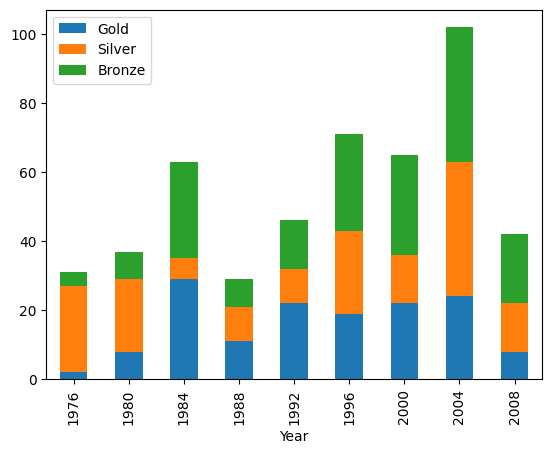

In [131]:
inp = 'China'
try:
    inp = input("Select a country from above list")
except:
    print("Input interrupted")
finally:
    temp = q6_data[q6_data.Country == inp]
    temp.plot(kind = 'bar',stacked = True,x = 'Year', y= ['Gold', 'Silver', 'Bronze'])

### Ans. So I created an interactive solution here. Input the country name from above list. And check its performance over year. 
Note : This may not resemble actual table tally because for eg., a gold in hockey is just one gold in table but here it is 16 gold because sixteen people got it. 
So it is more like how many people got a medal instead of how many gold medal a country got.

### Q7. Can you tell me which country has dominated any particular sport?

In [132]:
q7_data = data.groupby(['Sport', 'Country'])['Country'].count().reset_index(name = 'Count').sort_values(ascending = [True, False],by = ['Sport','Count'])
q7_data.Sport.unique()

array(['Aquatics', 'Archery', 'Athletics', 'Badminton', 'Baseball',
       'Basketball', 'Boxing', 'Canoe / Kayak', 'Cycling', 'Equestrian',
       'Fencing', 'Football', 'Gymnastics', 'Handball', 'Hockey', 'Judo',
       'Modern Pentathlon', 'Rowing', 'Sailing', 'Shooting', 'Softball',
       'Table Tennis', 'Taekwondo', 'Tennis', 'Triathlon', 'Volleyball',
       'Weightlifting', 'Wrestling'], dtype=object)

In [133]:
inp = 'Archery'
try:
    inp = input("Select a Sport from above list")
except:
    print("Input is interrupted")
temp = q7_data[q7_data['Sport'] == inp].head(3)
print(temp)

Select a Sport from above list Rowing


      Sport        Country  Count
531  Rowing        Romania    156
519  Rowing   East Germany    146
541  Rowing  United States    129


### Ans. So Here we have an interactive way to see which country has dominated which sport. For e.g., Netherland and Australia dominated Hockey in the given period.
Note : This may not resemble actual table tally because for eg., a gold in hockey is just one gold in table but here it is 16 gold because sixteen people got it. So it is more like how many people got a medal instead of how many gold medal a country got.

### Q8. Has any athlete changed his or her Event or Discipline or sport and still win the medal?

In [134]:
temp = data[['Athlete','Sport']].drop_duplicates()
temp = temp.groupby(['Athlete'])
for k,v in temp:
    if len(v['Sport'].tolist()) >1:
        print(k,v['Sport'].tolist())

('BELOVA, Irina',) ['Athletics', 'Gymnastics']
('CHEN, Jing',) ['Table Tennis', 'Volleyball']
('DIMITROV, Stefan',) ['Volleyball', 'Weightlifting']
('GAVRILOV, Yuri',) ['Football', 'Handball']
('GONZALEZ, Raul',) ['Athletics', 'Handball']
('KOLESNIKOV, Nikolai',) ['Athletics', 'Weightlifting']
('KOVACS, Istvan',) ['Wrestling', 'Boxing']
('KOVALENKO, Alexandre',) ['Athletics', 'Aquatics']
('KUZNETSOV, Mikhail',) ['Rowing', 'Canoe / Kayak']
('KUZNETSOV, Nikolai',) ['Rowing', 'Cycling']
('LEE, Eun Kyung',) ['Archery', 'Hockey']
('LI, Na',) ['Aquatics', 'Fencing']
('LI, Ting',) ['Aquatics', 'Tennis']
('OVCHINNIKOVA, Elena',) ['Volleyball', 'Aquatics']
('ROMERO, Rebecca',) ['Rowing', 'Cycling']
('THOMPSON, Richard',) ['Baseball', 'Athletics']
('TOMA, Sanda',) ['Rowing', 'Canoe / Kayak']
('WANG, Liping',) ['Football', 'Athletics']
('WELLS, Matthew',) ['Hockey', 'Rowing']
('YANG, Wei',) ['Badminton', 'Gymnastics']
('YOUNG, Tim',) ['Rowing', 'Baseball']


### Ans. So there has been quite a few player who has changed the sport and still won a medal. Kudos to them !!
Note : Here two different person had same name. for eg., Yang Wei from Gymanstic and from Badminton are different player. From thr given data we cannot distinguish between them. So take it with a pinch of salt

### Q9. (Follow up of Q6) Elaborate the result and dive into detials.(Pick any 5 country for this

In [230]:
q9_data = q6_data[['Year', 'Country', 'Sum']].groupby(['Year']).apply(lambda x : x.nlargest(5,'Sum'))

q9_data = q9_data.pivot( index = ['Year'], columns = ['Country'], values = ['Sum']).reset_index()
q9_data.columns  = q9_data.columns.droplevel(0)
# q9_data.columns = ['Year', 'Country', 'Gold', 'Silver', 'Bronze', 'Sum']
q9_data = q9_data.rename(columns={ q9_data.columns[0]: "Year" })
q9_data

# temp = q6_data.where(q6_data.Country.isin(q9_data.columns)).dropna()[["Year", "Country", "Sum"]]
# temp

Country,Year,Australia,Bulgaria,Canada,China,Cuba,East Germany,Germany,Hungary,Italy,"Korea, South",Poland,Romania,Russia,Soviet Union,Unified team,United States,West Germany,Yugoslavia
0,1976,NaN,NaN,NaN,NaN,NaN,192.0,NaN,NaN,NaN,NaN,73.0,NaN,NaN,285.0,NaN,155.0,75.0,NaN
1,1980,NaN,94.0,NaN,NaN,NaN,260.0,NaN,61.0,NaN,NaN,NaN,72.0,NaN,442.0,NaN,NaN,NaN,NaN
2,1984,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0,NaN,NaN,NaN,333.0,157.0,87.0
3,1988,NaN,NaN,NaN,NaN,NaN,174.0,NaN,NaN,NaN,77.0,NaN,NaN,NaN,294.0,NaN,193.0,113.0,NaN
4,1992,NaN,NaN,NaN,83.0,71.0,NaN,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223.0,224.0,NaN,NaN
5,1996,132.0,NaN,NaN,110.0,NaN,NaN,124.0,NaN,NaN,NaN,NaN,NaN,115.0,NaN,NaN,260.0,NaN,NaN
6,2000,183.0,NaN,NaN,79.0,NaN,NaN,119.0,NaN,NaN,NaN,NaN,NaN,188.0,NaN,NaN,248.0,NaN,NaN
7,2004,157.0,NaN,NaN,NaN,NaN,NaN,149.0,NaN,102.0,NaN,NaN,NaN,192.0,NaN,NaN,264.0,NaN,NaN
8,2008,149.0,NaN,NaN,184.0,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,143.0,NaN,NaN,315.0,NaN,NaN


In [255]:
q9_data = q6_data[['Year', 'Country', 'Sum']].groupby(['Year']).apply(lambda x : x.nlargest(5,'Sum'))['Country'].drop_duplicates()
temp = q6_data.where(q6_data.Country.isin(q9_data)).dropna()[["Year", "Country", "Sum"]]
temp = temp.pivot(index = ['Year'], columns = ['Country'], values = ['Sum']).reset_index()
temp.columns = temp.columns.droplevel(0)
temp = temp.rename(columns={ temp.columns[0]: "Year" })
q9_data = temp.replace(np.nan, 0)
q9_data

Country,Year,Australia,Bulgaria,Canada,China,Cuba,East Germany,Germany,Hungary,Italy,"Korea, South",Poland,Romania,Russia,Soviet Union,Unified team,United States,West Germany,Yugoslavia
0,1976.0,24.0,39.0,20.0,0.0,24.0,192.0,0.0,55.0,31.0,17.0,73.0,55.0,0.0,285.0,0.0,155.0,75.0,19.0
1,1980.0,12.0,94.0,0.0,0.0,20.0,260.0,0.0,61.0,37.0,0.0,50.0,72.0,0.0,442.0,0.0,0.0,0.0,57.0
2,1984.0,50.0,0.0,86.0,76.0,0.0,0.0,0.0,0.0,63.0,42.0,0.0,106.0,0.0,0.0,0.0,333.0,157.0,87.0
3,1988.0,34.0,41.0,21.0,53.0,0.0,174.0,0.0,44.0,29.0,77.0,21.0,51.0,0.0,294.0,0.0,193.0,113.0,63.0
4,1992.0,57.0,17.0,44.0,83.0,71.0,0.0,198.0,45.0,46.0,49.0,42.0,53.0,0.0,0.0,223.0,224.0,0.0,0.0
5,1996.0,132.0,21.0,51.0,110.0,57.0,0.0,124.0,43.0,71.0,66.0,21.0,38.0,115.0,0.0,0.0,260.0,0.0,26.0
6,2000.0,183.0,13.0,31.0,79.0,69.0,0.0,119.0,53.0,65.0,73.0,24.0,46.0,188.0,0.0,0.0,248.0,0.0,26.0
7,2004.0,157.0,17.0,17.0,94.0,61.0,0.0,149.0,40.0,102.0,52.0,12.0,39.0,192.0,0.0,0.0,264.0,0.0,0.0
8,2008.0,149.0,5.0,34.0,184.0,47.0,0.0,101.0,27.0,42.0,78.0,20.0,22.0,143.0,0.0,0.0,315.0,0.0,0.0


### So these are the top 5 countries in each olympic game. Lets Combine Soviet Union + Unified Team +Russia and East Germany + West Germany + Germany. 
### Also lets drop Yugoslavia, Poland, South Korea, Italy, Hungary, Cuba, Canada, Bulgaria as they are only shown up once in top 5. 

In [256]:
q9_data.Germany = q9_data.Germany + q9_data['East Germany'] + q9_data['West Germany']
q9_data.Russia = q9_data['Soviet Union'] + q9_data.Russia + q9_data['Unified team']
q9_data = q9_data.drop(['Yugoslavia','Poland','Korea, South','Italy','Hungary','Cuba','Canada','Bulgaria','East Germany', 'West Germany', 'Soviet Union', 'Unified team'], axis = 1)
q9_data =q9_data.set_index('Year')
q9_data

Country,Australia,China,Germany,Romania,Russia,United States
Year,,,,,,
1976.0,24.0,0.0,267.0,55.0,285.0,155.0
1980.0,12.0,0.0,260.0,72.0,442.0,0.0
1984.0,50.0,76.0,157.0,106.0,0.0,333.0
1988.0,34.0,53.0,287.0,51.0,294.0,193.0
1992.0,57.0,83.0,198.0,53.0,223.0,224.0
1996.0,132.0,110.0,124.0,38.0,115.0,260.0
2000.0,183.0,79.0,119.0,46.0,188.0,248.0
2004.0,157.0,94.0,149.0,39.0,192.0,264.0
2008.0,149.0,184.0,101.0,22.0,143.0,315.0


### Lets plot line graph for this

<Axes: xlabel='Year'>

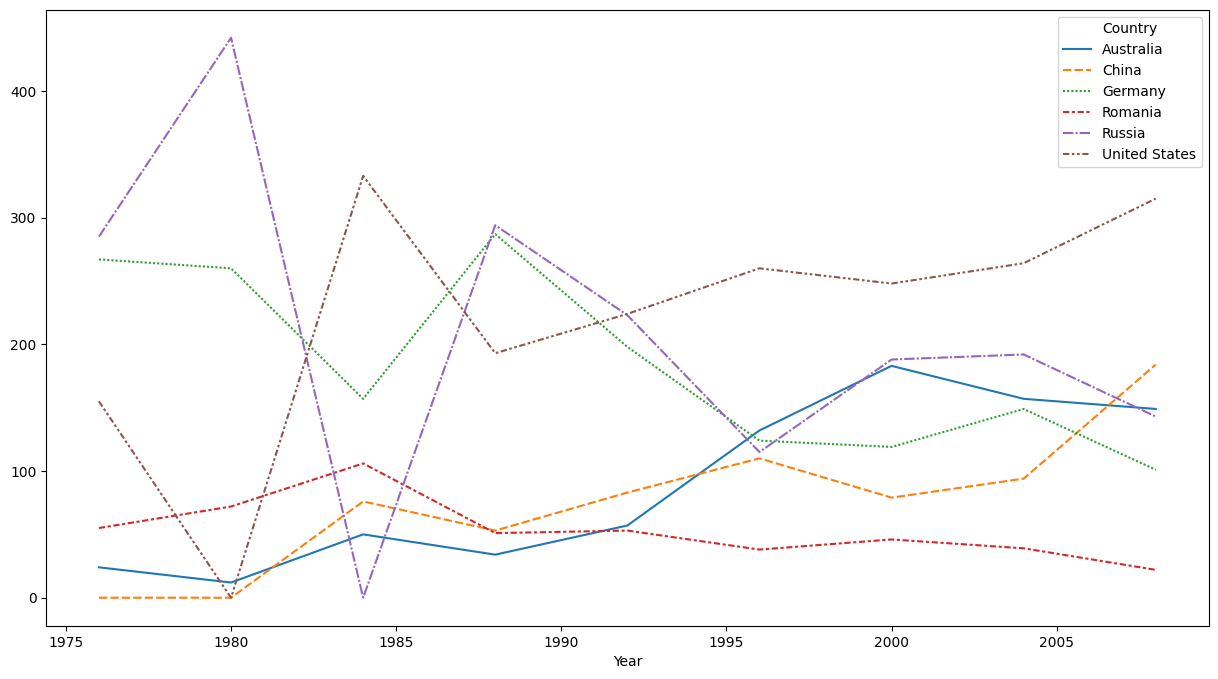

In [262]:
# q9_data.plot(x = 'Year', y= q9_data.columns[1:])
import seaborn as sns
plt.figure(figsize=(15,8))
sns.lineplot(data = q9_data)

### Ans. We can clearly see some pattern here.

* Soviet Union(Russia here) dominated Olypics with decline over time except 1982 where it boycotted entire olypics.
* US after boycotting 1980 olypics, rose up to be the dominating player here. 
* Germany as a whole country inlcuding (west and east), saw continous decline over period of time.
* China and Australia has witnessed steady rise in their medal tally
* Romania has been same overpeiod with little decline.

Note: The number do not represent number of medal but the total people who won it. E.g., Winner in hockey gets one gold, but 16 people are given the medal. So here we are counting 16. 

###  Any comments or suggestion or correction is most welcomed. Thank you very much.

## The End.

# 